In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing
from sklearn.model_selection import train_test_split

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

In [4]:
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=0)

In [5]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               7168      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['mae'])

In [7]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels,
                    epochs=60,
                    batch_size=64,
                    validation_data=(val_data, val_labels))

Epoch 1/60
6/6 [==============================] - 1s 40ms/step - loss: 316.8530 - mae: 14.9108 - val_loss: 70.8537 - val_mae: 7.3852
Epoch 2/60
6/6 [==============================] - 0s 9ms/step - loss: 42.1539 - mae: 4.6090 - val_loss: 35.2531 - val_mae: 5.0600
Epoch 3/60
6/6 [==============================] - 0s 6ms/step - loss: 26.2345 - mae: 3.6760 - val_loss: 15.3453 - val_mae: 3.0594
Epoch 4/60
6/6 [==============================] - 0s 5ms/step - loss: 21.1342 - mae: 3.1614 - val_loss: 14.8907 - val_mae: 2.9978
Epoch 5/60
6/6 [==============================] - 0s 5ms/step - loss: 17.6067 - mae: 2.8912 - val_loss: 109.6755 - val_mae: 7.1291
Epoch 6/60
6/6 [==============================] - 0s 5ms/step - loss: 97.0499 - mae: 6.5422 - val_loss: 18.4732 - val_mae: 3.2771
Epoch 7/60
6/6 [==============================] - 0s 6ms/step - loss: 15.6399 - mae: 2.7545 - val_loss: 12.7373 - val_mae: 2.7970
Epoch 8/60
6/6 [==============================] - 0s 7ms/step - loss: 14.2249 - mae: 2

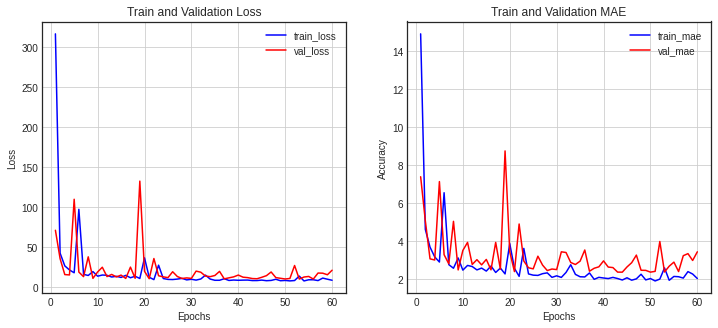

In [8]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [9]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 33.3082 - mae: 3.7597


[33.30818176269531, 3.759664535522461]

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [11]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=0)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(train_labels))
print(len(set(train_labels)))

6736
2246
2246
6736
46


In [12]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [13]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(46, activation='softmax', name='output'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)              

In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('reuters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
211/211 [==============================] - 7s 24ms/step - loss: 1.5781 - accuracy: 0.6418 - val_loss: 1.3151 - val_accuracy: 0.7556
Epoch 2/60
211/211 [==============================] - 5s 24ms/step - loss: 0.9803 - accuracy: 0.7709 - val_loss: 0.9634 - val_accuracy: 0.7961
Epoch 3/60
211/211 [==============================] - 5s 23ms/step - loss: 0.7358 - accuracy: 0.8227 - val_loss: 0.9075 - val_accuracy: 0.8050
Epoch 4/60
211/211 [==============================] - 5s 22ms/step - loss: 0.5885 - accuracy: 0.8561 - val_loss: 0.9097 - val_accuracy: 0.8126
Epoch 5/60
211/211 [==============================] - 5s 23ms/step - loss: 0.4786 - accuracy: 0.8802 - val_loss: 0.9112 - val_accuracy: 0.8148
Epoch 6/60
211/211 [==============================] - 5s 23ms/step - loss: 0.4083 - accuracy: 0.9013 - val_loss: 0.9621 - val_accuracy: 0.8179
Epoch 7/60
211/211 [==============================] - 5s 22ms/step - loss: 0.3763 - accuracy: 0.9044 - val_loss: 0.9610 - val_accuracy: 0.8183

KeyboardInterrupt: 

In [ ]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [ ]:
model.evaluate(x_test, y_test)

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [2]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=0)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [3]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

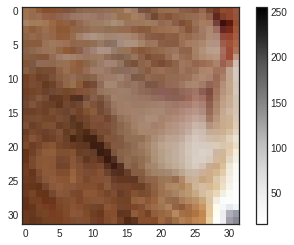

In [4]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [5]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

x_train = x_train.reshape(-1, 3072)
x_val = x_val.reshape(-1, 3072)
x_test = x_test.reshape(-1, 3072)

In [7]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = layers.Input(shape=(3072, ))
hidden1 = layers.Dense(2048)(inputs)
bn1 = layers.BatchNormalization()(hidden1)
#activation_1 = layers.Dense(2048, activation='relu')(bn1)
activation_1 = layers.Activation('relu')(bn1)
drop_out_1 = layers.Dropout(0.5)(activation_1)
hidden2 = layers.Dense(1024)(drop_out_1)
bn2 = layers.BatchNormalization()(hidden2)
#activation_2 = layers.Dense(1024, activation='relu')(bn2)
activation_2 = layers.Activation('relu')(bn2)
drop_out_2 = layers.Dropout(0.5)(activation_2)
hidden3 = layers.Dense(512)(drop_out_2)
bn3 = layers.BatchNormalization()(hidden3)
#activation_3 = layers.Dense(512, activation='relu')(bn3)
activation_3 = layers.Activation('relu')(bn3)
drop_out_3 = layers.Dropout(0.5)(activation_3)
outputs = layers.Dense(512, activation='relu')(drop_out_3)
outputs = layers.Dense(10, activation='softmax')(outputs)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 2048)              6293504   
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
activation (Activation)      (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096  

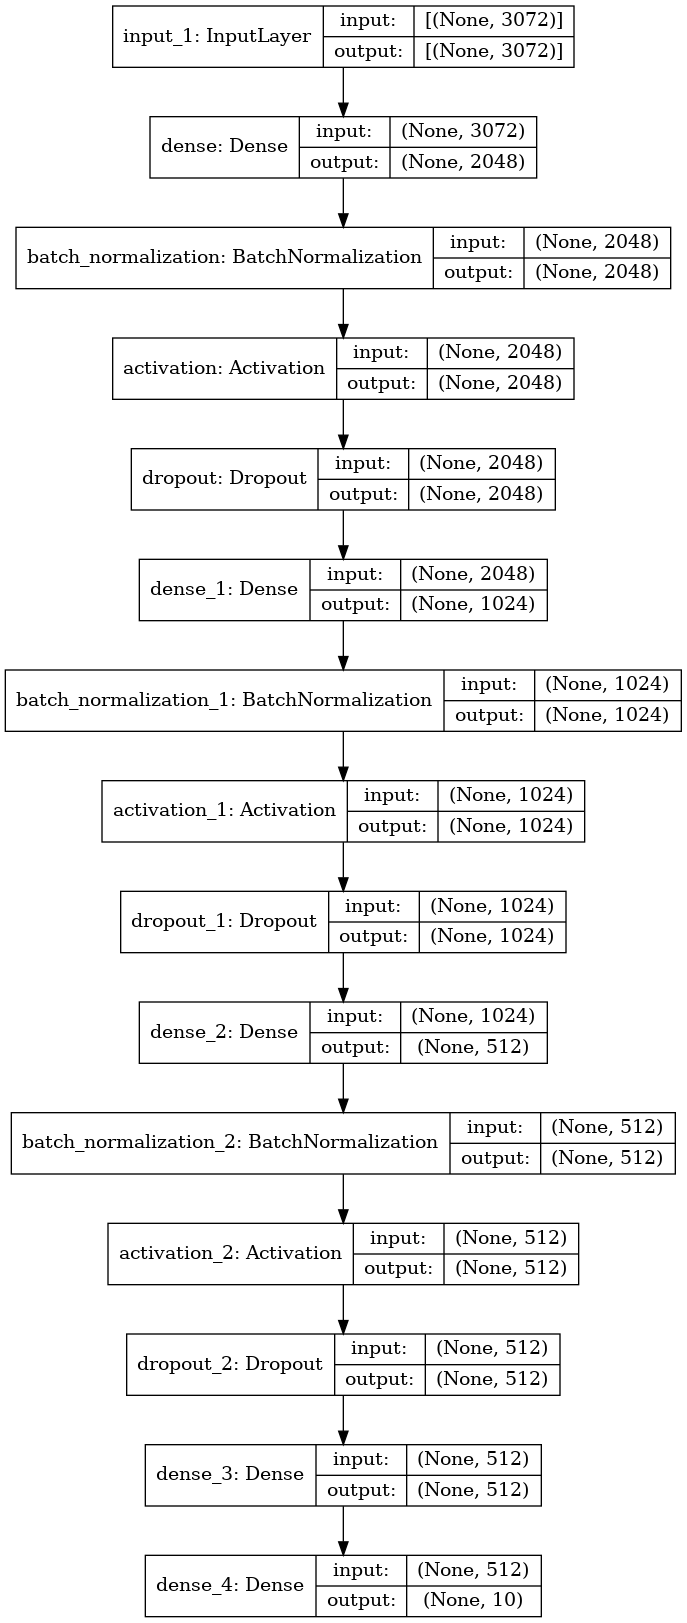

In [8]:
from tensorflow.keras import utils

utils.plot_model(model, show_shapes=True)

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [10]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('cifar_10.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1250/1250 [==============================] - 98s 77ms/step - loss: 2.0495 - accuracy: 0.2609 - val_loss: 1.7662 - val_accuracy: 0.3526
Epoch 2/10
1250/1250 [==============================] - 95s 76ms/step - loss: 1.8479 - accuracy: 0.3345 - val_loss: 1.6652 - val_accuracy: 0.3916
Epoch 3/10
1250/1250 [==============================] - 95s 76ms/step - loss: 1.7709 - accuracy: 0.3584 - val_loss: 1.6020 - val_accuracy: 0.4176
Epoch 4/10
1250/1250 [==============================] - 95s 76ms/step - loss: 1.7173 - accuracy: 0.3782 - val_loss: 1.5932 - val_accuracy: 0.4148
Epoch 5/10
1250/1250 [==============================] - 95s 76ms/step - loss: 1.6754 - accuracy: 0.3969 - val_loss: 1.5984 - val_accuracy: 0.4209
Epoch 6/10
1250/1250 [==============================] - 95s 76ms/step - loss: 1.6396 - accuracy: 0.4128 - val_loss: 1.5273 - val_accuracy: 0.4473
Epoch 7/10
1250/1250 [==============================] - 95s 76ms/step - loss: 1.6118 - accuracy: 0.4221 - val_loss: 1.5096 -

In [11]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

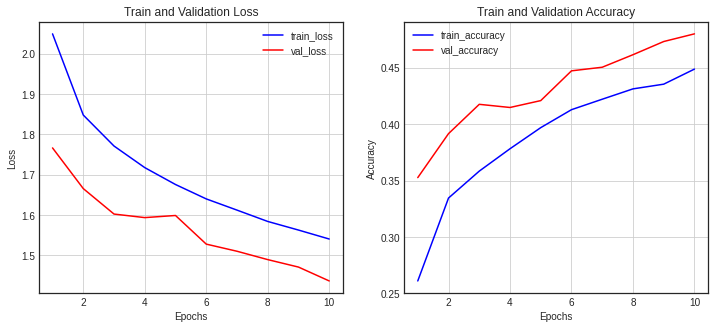

In [12]:
show_history(history)

In [13]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 8s 24ms/step - loss: 1.4219 - accuracy: 0.4873


[1.4218928813934326, 0.48730000853538513]